<a href="https://colab.research.google.com/github/brhema2704/ML-Projects/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM SMS DETECTION

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Extract the dataset

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip
uploaded = files.upload()

# Extract the uploaded ZIP
zip_path = "archive (5).zip"
extract_dir = "spam_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Saving archive (5).zip to archive (5).zip


Load Dataset

In [ ]:
df = pd.read_csv("/content/spam_data/spam.csv", encoding = 'latin-1')
df = df[['v1', 'v2']]  # Keep only label and text columns
df.columns = ['label', 'message']


Data Preprocessing

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Encode: ham=0, spam=1
X = df['message']
y = df['label']


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TF-IDF Vectorization

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Model Evaluation Function

In [ ]:
def evaluate_model(model, name):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    print(f"\n🔍 Results for {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Naive Bayes


🔍 Results for Naive Bayes
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



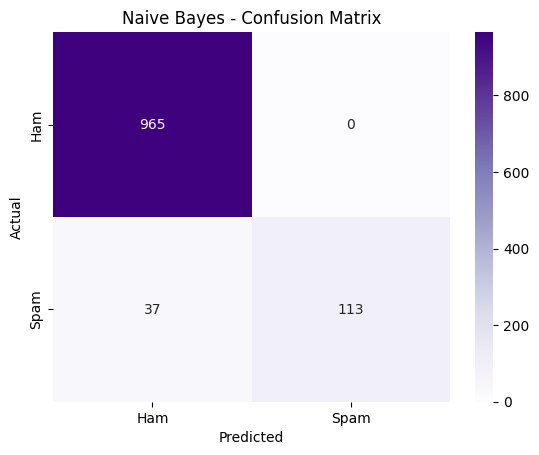

In [ ]:
nb_model = MultinomialNB()
evaluate_model(nb_model, "Naive Bayes")


Logistic Regression


🔍 Results for Logistic Regression
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



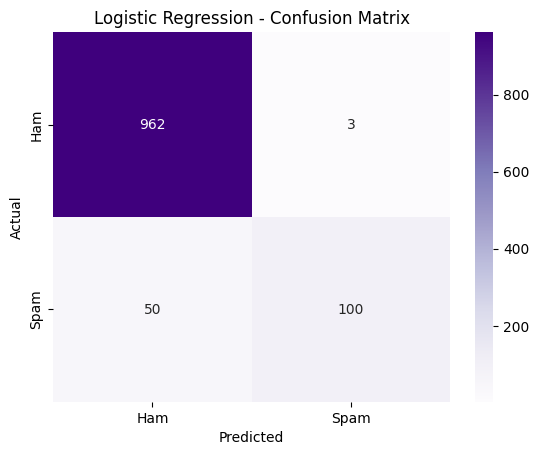

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, "Logistic Regression")


Support Vector Machine


🔍 Results for Support Vector Machine (SVM)
Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



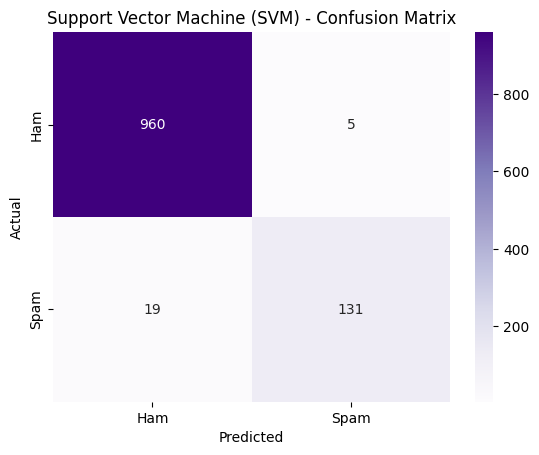

In [ ]:
svm_model = LinearSVC()
evaluate_model(svm_model, "Support Vector Machine (SVM)")
